In [1]:
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib
import os

from sklearn.model_selection import GridSearchCV

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('../data/train_test/anxiety_train.csv')

In [3]:
X = data.drop(columns='Anxiety_Group')

y = data['Anxiety_Group']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55)

In [5]:
dt = DecisionTreeClassifier(random_state=55)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,55
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

In [7]:
print("Accuracy Decision Tree:", acc_dt)

Accuracy Decision Tree: 0.9044758185641334


In [8]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dt))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1684
           1       0.90      0.91      0.90      1645

    accuracy                           0.90      3329
   macro avg       0.90      0.90      0.90      3329
weighted avg       0.90      0.90      0.90      3329



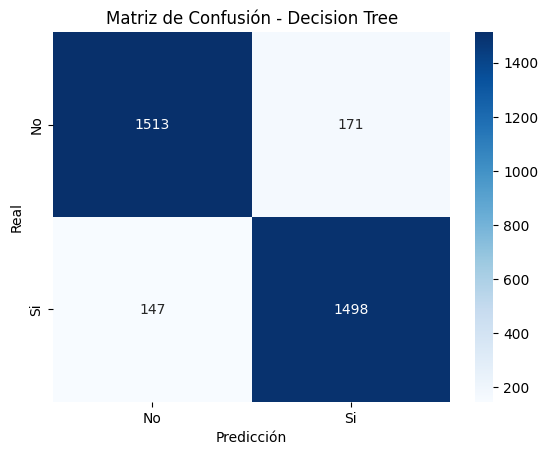

In [9]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - Decision Tree")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Grid Search

In [10]:
param_grid = {
    'max_depth': [2, 3, 5, None], 
    'criterion': ['gini', 'entropy']  
}

In [11]:
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5, 
    scoring='balanced_accuracy',
    n_jobs=-1 
)

In [12]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...]}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [13]:
pred = grid.predict(X_test)

In [14]:
print("Mejor accuracy CV:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

Mejor accuracy CV: 0.9080244632431846
Mejores parámetros: {'criterion': 'entropy', 'max_depth': None}


In [15]:
results = pd.DataFrame(grid.cv_results_)
results = results[[
    'param_max_depth',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'    ]]

print(results.sort_values(by='rank_test_score'))

  param_max_depth  mean_test_score  std_test_score  rank_test_score
7            None         0.908024        0.005644                1
3            None         0.905624        0.006228                2
2               5         0.866281        0.005477                3
6               5         0.857879        0.005688                4
5               3         0.855179        0.007266                5
1               3         0.852394        0.008633                6
0               2         0.831027        0.006608                7
4               2         0.831027        0.006608                7


In [16]:
'''plt.figure(figsize=(8,6))
plt.plot(results['param_max_depth'], results['mean_test_score'], marker='o')
plt.title("Accuracy medio vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Mean CV Accuracy")
plt.show()'''

'plt.figure(figsize=(8,6))\nplt.plot(results[\'param_max_depth\'], results[\'mean_test_score\'], marker=\'o\')\nplt.title("Accuracy medio vs max_depth")\nplt.xlabel("max_depth")\nplt.ylabel("Mean CV Accuracy")\nplt.show()'

pickle.dump(log_reg, open('modelo_final.pkl', 'wb'))

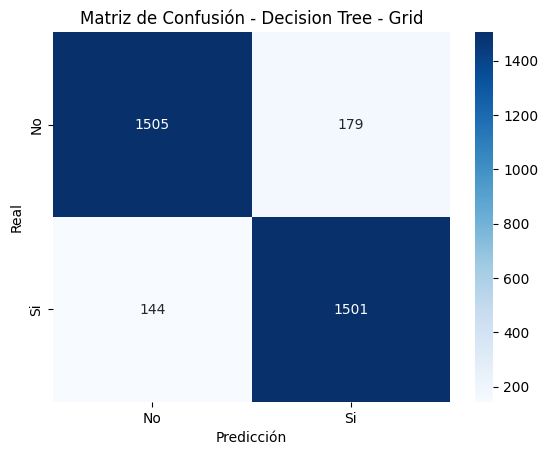

In [17]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - Decision Tree - Grid")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [18]:
models = '../models'
best_model = grid.best_estimator_
final_model_path = os.path.join(models, 'modelo_decision_tree.pkl')
joblib.dump(best_model, final_model_path)
print(f"Modelo final guardado en: {final_model_path}")

Modelo final guardado en: ../models\modelo_decision_tree.pkl
